In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sq_wave(t):
    if (np.abs(t) <= 0.5):
        return 1
    return 0


def sq_wave_fourier_image(t):
    return np.sin(np.pi * t)/(np.pi * t)


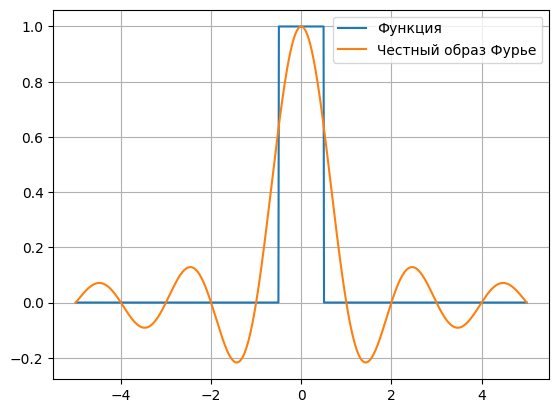

In [3]:
fig, ax = plt.subplots()
ax.grid(True)
x = np.linspace(-5, 5, 1000)
sq_wave_y = [sq_wave(t) for t in x]
        
sq_wave_image = [sq_wave_fourier_image(i) for i in x]
ax.plot(x, sq_wave_y, label="Функция")
ax.plot(x, sq_wave_image, label="Честный образ Фурье")
ax.legend()
None

In [4]:
def trapz_ft(function, time, dt):
    def integrand(nu):
        integral = lambda t: function(t) * np.exp(-2j * np.pi * nu * t)
        temp = [integral(i) for i in time]
        return np.trapz(temp, time)
    return lambda t: integrand(t) #for i in time


In [5]:
def trapz_inverse_ft(ft_function, time, dt):
    def integrand(t):
        integral = lambda nu: ft_function(nu) * np.exp(2j * np.pi * nu * t)
        temp = [integral(i) for i in time]
        return np.trapz(temp, time)
    return lambda t: integrand(t)

In [6]:
numeric_wave_fft = trapz_ft(sq_wave, x, 1)
None

In [7]:
numeric_wave_inverse_fft = trapz_inverse_ft(numeric_wave_fft, x, 1)
None

In [ ]:
# find Fourier image with numeric integration
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(x, sq_wave_y, label='Функция')
ax.plot(x, [(numeric_wave_fft(i)) for i in x], label='Образ Фурье через trapz')
ax.legend()
None

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)
# ax.plot(x, sq_wave_y)
time = np.linspace(-1, 1, 1000)
ax.plot(time, [numeric_wave_inverse_fft(i) for i in time], label='Востановленная квадратная волна')
ax.legend()
None

In [ ]:

# def generate_square_wave(length):
#     """Generate a square wave of given length."""
#     t = np.arange(length)/length
#     return np.sign(np.sin(2 * np.pi * 1 * t))

/tmp/ipykernel_10222/3138117071.py:8: RuntimeWarning: invalid value encountered in scalar divide
  return np.sin(np.pi * t)/(np.pi * t)


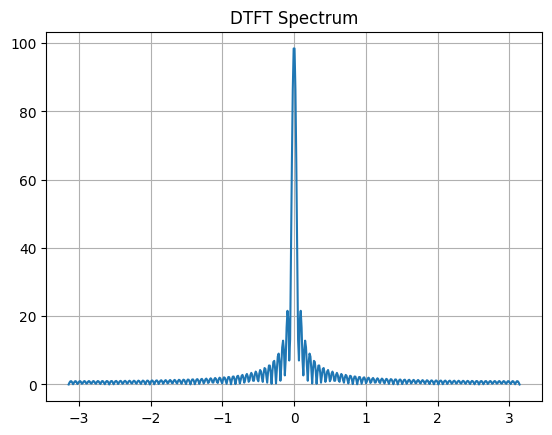

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import signal

fs=2*np.pi
def DTFT(x,a,b):
    num =np.array(x)
    den = np.array([1])
    ws, h = signal.freqz(num,a=den,whole=True,worN=np.linspace(a,b,512))
    # sq_wave_image2 = [(sq_wave_fourier_image(i)) for i in x]
    fig, ax = plt.subplots()
    # ax.plot(x, sq_wave_image2, '--')
    ax.grid(True)
    ax.plot(ws,np.abs(h))
    plt.title('DTFT Spectrum')
    return h

dtft_image = DTFT(sq_wave_y,-fs/2,fs/2)

In [ ]:
wave_fourier_transform = np.fft.fftshift(np.fft.fft(sq_wave_y, 100))

In [ ]:
def draw_fft(fourier_image, label, filename):
    fig, ax = plt.subplots()
    ax.plot(np.abs(fourier_image))
    plt.xlabel('Frequencies (Hz)')
    plt.ylabel('Magnitude of frequencies')
    plt.grid(True)
    plt.title(label)

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)
ax.plot(sq_wave_y)
draw_fft(wave_fourier_transform, "FFT Фурье-образ", "")
None

In [ ]:
wave_back_from_dft = np.fft.ifft(np.fft.ifftshift(wave_fourier_transform))

In [ ]:
fig, ax = plt.subplots()
ax.grid(True)
# ax.plot(x, sq_wave_y)
ax.plot(x, wave_back_from_dft, '--')
None